# SciPy: Numpy, Scipy and Pandas

In [12]:
import numpy as np
import pandas as pd

### Numpy Arrays

In [13]:
np_array = np.arange(10)
np_array

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
np_array**3

array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729], dtype=int32)

In [15]:
np.arange(10) - np.arange(10)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
len(np_array)

10

In [17]:
np_array = np.arange(100)
tmp = np_array.reshape(10,10)
tmp

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [18]:
tmp.T

array([[ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
       [ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91],
       [ 2, 12, 22, 32, 42, 52, 62, 72, 82, 92],
       [ 3, 13, 23, 33, 43, 53, 63, 73, 83, 93],
       [ 4, 14, 24, 34, 44, 54, 64, 74, 84, 94],
       [ 5, 15, 25, 35, 45, 55, 65, 75, 85, 95],
       [ 6, 16, 26, 36, 46, 56, 66, 76, 86, 96],
       [ 7, 17, 27, 37, 47, 57, 67, 77, 87, 97],
       [ 8, 18, 28, 38, 48, 58, 68, 78, 88, 98],
       [ 9, 19, 29, 39, 49, 59, 69, 79, 89, 99]])

In [19]:
print(tmp[0])
print(tmp[8,9])

[0 1 2 3 4 5 6 7 8 9]
89


In [20]:
tmp.sum()

4950

In [21]:
tmp.sum(axis=1)

array([ 45, 145, 245, 345, 445, 545, 645, 745, 845, 945])

## Basic plotting

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

random_sample = np.random.normal(size=500)
random_sample[0]



-0.6246321944933578

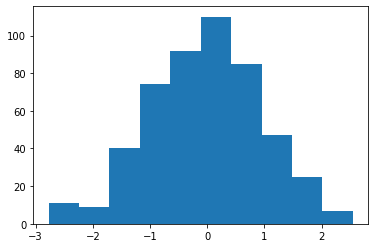

In [70]:
plt.hist(random_sample);

In [71]:
np.median(random_sample)

0.007589437931335269

In [72]:
random_sample.mean()

-0.02265192245852814

# Pandas

In [26]:
#read csv

In [28]:
ami_icd_df = pd.read_csv('./ami_icd_codes.csv')
ami_icd_df.head()

,icd_type,diag_code
0,9,41000
1,9,41001
2,9,41010
3,9,41011
4,9,41020


In [29]:
ami_icd_df.columns

Index(['icd_type', 'diag_code'], dtype='object')

In [73]:
#column select
ami_icd_df['diag_code'].head()

0    41000
1    41001
2    41010
3    41011
4    41020
Name: diag_code, dtype: object

In [48]:
ami_icd_df['diag_code']=='41000'

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
Name: diag_code, dtype: bool

In [49]:
ami_icd_df.loc[ami_icd_df['diag_code']=='41000']

,icd_type,diag_code
0,9,41000


### finding unique values in a column

unique and nunique

In [58]:
ami_icd_df['icd_type'].unique()

array([ 9, 10], dtype=int64)

In [57]:
ami_icd_df['icd_type'].nunique()

2

In [60]:
ami_icd_df['diag_code'].nunique()

32

### Intro to group by

In [78]:
ami_icd_df.groupby(['icd_type']).count()

,diag_code
icd_type,
9,20
10,12


## Database Connections

to perform secure connections to database use the ODBC Data Source Administrator

In [74]:
#database connection
import pyodbc
con = pyodbc.connect('DSN=PostgreSQL35W')

In [82]:
sql_query = '''select * from dev.gm_distinct_values;'''
distinct_codes_df = pd.read_sql(sql_query, con=con)

In [83]:
distinct_codes_df.shape

(357429, 6)

In [84]:
distinct_codes_df.head()

,database_name,table_name,column_name,column_values,column_count,import_date
0,data_warehouse,admission,discharge_status,93,769,2021-10-18 15:46:57.358080
1,data_warehouse,claim_detail,year,2002,112,2021-10-18 15:46:58.419070
2,data_warehouse,claim_detail,year,2009,778525624,2021-10-18 15:46:58.419070
3,data_warehouse,claim_detail,place_of_service,,163922,2021-10-18 15:48:38.169243
4,data_warehouse,claim_detail,place_of_service,63,5703,2021-10-18 15:48:38.169243


In [85]:
distinct_codes_df = distinct_codes_df.sort_values(['table_name','column_values'])

In [86]:
#pandas handles datetimes
distinct_codes_df['import_date']

18658   2021-10-21 20:01:30.218340
19891   2021-10-18 15:46:57.358080
3677    2021-10-18 15:46:57.358080
18657   2021-10-21 20:01:30.218340
6651    2021-10-21 20:01:30.218340
                   ...            
3193    2021-10-18 20:39:18.417156
18118   2021-10-18 20:39:18.417156
7847    2021-10-18 20:40:25.677771
15866   2021-10-18 20:41:21.906182
16507   2021-10-18 20:42:18.457989
Name: import_date, Length: 357429, dtype: datetime64[ns]

In [87]:
#duplicate values
dups = distinct_codes_df.duplicated(subset=['database_name', 'table_name', 
                                            'column_name', 'column_values'])
distinct_codes_df.loc[dups]

,database_name,table_name,column_name,column_values,column_count,import_date
19891,data_warehouse,admission,discharge_status,00,1112507,2021-10-18 15:46:57.358080
18657,data_warehouse,admission,discharge_status,01,27920450,2021-10-21 20:01:30.218340
18490,data_warehouse,admission,discharge_status,02,1666891,2021-10-18 15:46:57.358080
14603,data_warehouse,admission,discharge_status,03,3756358,2021-10-18 15:46:57.358080
14657,data_warehouse,admission,discharge_status,04,233336,2021-10-21 20:01:30.218340
...,...,...,...,...,...,...
19407,data_warehouse,medicaid_program_enrollment,mco_id,None,79085526,2021-10-18 16:17:14.995034
20059,data_warehouse,medicaid_program_enrollment,me_sd,None,79085526,2021-10-18 16:17:09.430261
19526,data_warehouse,member_enrollment_yearly,rx_coverage,0,75720929,2021-10-18 16:26:01.366432
4292,data_warehouse,member_enrollment_yearly,rx_coverage,1,954438465,2021-10-18 16:24:00.762940


In [88]:
#drop duplicates
distinct_codes_df = distinct_codes_df.drop_duplicates(subset=['database_name', 'table_name', 
                                                              'column_name', 'column_values'])

### Summary statistics

In [89]:
print(distinct_codes_df['column_count'].mean())
print(distinct_codes_df['column_count'].max())

2721444.6758198226
36103916737


In [90]:
distinct_codes_df.describe()

,column_count
count,3.571810e+05
mean,2.721445e+06
std,1.690679e+08
min,1.000000e+00
25%,4.000000e+00
50%,4.500000e+01
75%,1.225000e+03
max,3.610392e+10


In [93]:
distinct_codes_df.groupby(['table_name','column_name'])[['column_count']].mean()

column_count
table_name               column_name                           
admission                data_source               2.161906e+07
                         discharge_status          8.007059e+05
                         table_id_src              1.621430e+07
claim_detail             bill_type_class           1.299611e+09
                         bill_type_inst            1.299611e+09
...                                                         ...
member_enrollment_yearly year                      6.867729e+07
pharmacy_claims          data_source               1.678329e+09
                         dispensed_as_written      8.391646e+08
                         first_fill                3.356658e+09
                         retail_or_mail_indicator  1.678329e+09

[89 rows x 1 columns]

In [94]:
distinct_codes_df.groupby(['table_name','column_name'])[['column_count']].count()

column_count
table_name               column_name                           
admission                data_source                          3
                         discharge_status                    81
                         table_id_src                         4
claim_detail             bill_type_class                     22
                         bill_type_inst                      22
...                                                         ...
member_enrollment_yearly year                                15
pharmacy_claims          data_source                          6
                         dispensed_as_written                12
                         first_fill                           3
                         retail_or_mail_indicator             6

[89 rows x 1 columns]

In [96]:
#both a once
distinct_codes_df.groupby(['table_name','column_name'])['column_count'].agg(['mean','count'])

mean  count
table_name               column_name                                  
admission                data_source               2.161906e+07      3
                         discharge_status          8.007059e+05     81
                         table_id_src              1.621430e+07      4
claim_detail             bill_type_class           1.299611e+09     22
                         bill_type_inst            1.299611e+09     22
...                                                         ...    ...
member_enrollment_yearly year                      6.867729e+07     15
pharmacy_claims          data_source               1.678329e+09      6
                         dispensed_as_written      8.391646e+08     12
                         first_fill                3.356658e+09      3
                         retail_or_mail_indicator  1.678329e+09      6

[89 rows x 2 columns]

In [97]:
#group by dates
distinct_codes_df.resample('D', on='import_date')[['column_values']].count()

,column_values
import_date,
2021-10-18,10656
2021-10-19,12
2021-10-20,0
2021-10-21,346469


In [116]:
dx_codes_df = distinct_codes_df.loc[(distinct_codes_df['table_name']=='claim_diag')&
                      (distinct_codes_df['column_name']=='icd_type')]
dx_codes_df

,database_name,table_name,column_name,column_values,column_count,import_date
297851,data_warehouse,claim_diag,icd_type,,7952144,2021-10-21 20:07:05.475132
267891,data_warehouse,claim_diag,icd_type,,379875,2021-10-21 20:07:05.475132
277561,data_warehouse,claim_diag,icd_type,0,17108590716,2021-10-21 20:07:05.475132
270450,data_warehouse,claim_diag,icd_type,0,1891166975,2021-10-21 20:07:05.475132
273738,data_warehouse,claim_diag,icd_type,10,9804060570,2021-10-21 20:07:05.475132
295852,data_warehouse,claim_diag,icd_type,2,225,2021-10-21 20:07:05.475132
278563,data_warehouse,claim_diag,icd_type,3,275,2021-10-21 20:07:05.475132
287697,data_warehouse,claim_diag,icd_type,5,100,2021-10-21 20:07:05.475132
278237,data_warehouse,claim_diag,icd_type,9,20859069776,2021-10-21 20:07:05.475132
260636,data_warehouse,claim_diag,icd_type,9,22950,2021-10-21 20:07:05.475132


In [120]:
print(dx_codes_df['column_values'].nunique())
dx_codes_df['column_values'].unique()

11


array(['', '     ', '0', '0    ', '10', '2', '3', '5', '9', '9    ', 'O',
       None], dtype=object)

In [121]:
dx_codes_df['stripped_column_values'] = dx_codes_df['column_values'].str.strip()

print(dx_codes_df['stripped_column_values'].nunique())


8


<ipython-input-121-209641d660c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx_codes_df['stripped_column_values'] = dx_codes_df['column_values'].str.strip()


In [125]:
dx_codes_df.groupby(['stripped_column_values'])[['column_count']].sum()

,column_count
stripped_column_values,
,8332019
0,18999757691
10,9804060570
2,225
3,275
5,100
9,20859092726
O,150


<AxesSubplot:ylabel='Frequency'>

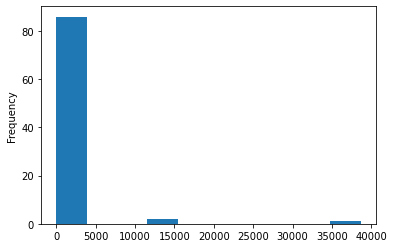

In [126]:
distinct_codes_df.groupby(['table_name','column_name']).nunique()['column_count'].plot(kind='hist')